# Target Pattern in Top 4 most affected countries by terrorist attacks

In [1]:
import numpy as np
import pandas as pd
import os
import glob
pd.options.mode.chained_assignment = None
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [3]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        ana_5_data=pd.read_csv(source, low_memory=False, encoding='ISO-8859-1')
ana_5_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data = ana_5_data[['gname', 'motive', 'attacktype1_txt', 'country_txt', 'region_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1']]

data['motive'] = data['motive'].fillna(0).astype(str)

data_iraq=data[(data.country_txt == 'Iraq') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()
data_afghanistan=data[(data.country_txt == 'Afghanistan') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()
data_nigeria=data[(data.country_txt == 'Nigeria') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()
data_syria=data[(data.country_txt == 'Syria') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()


#data = data.sort_values(['targtype1_txt'], ascending = False)

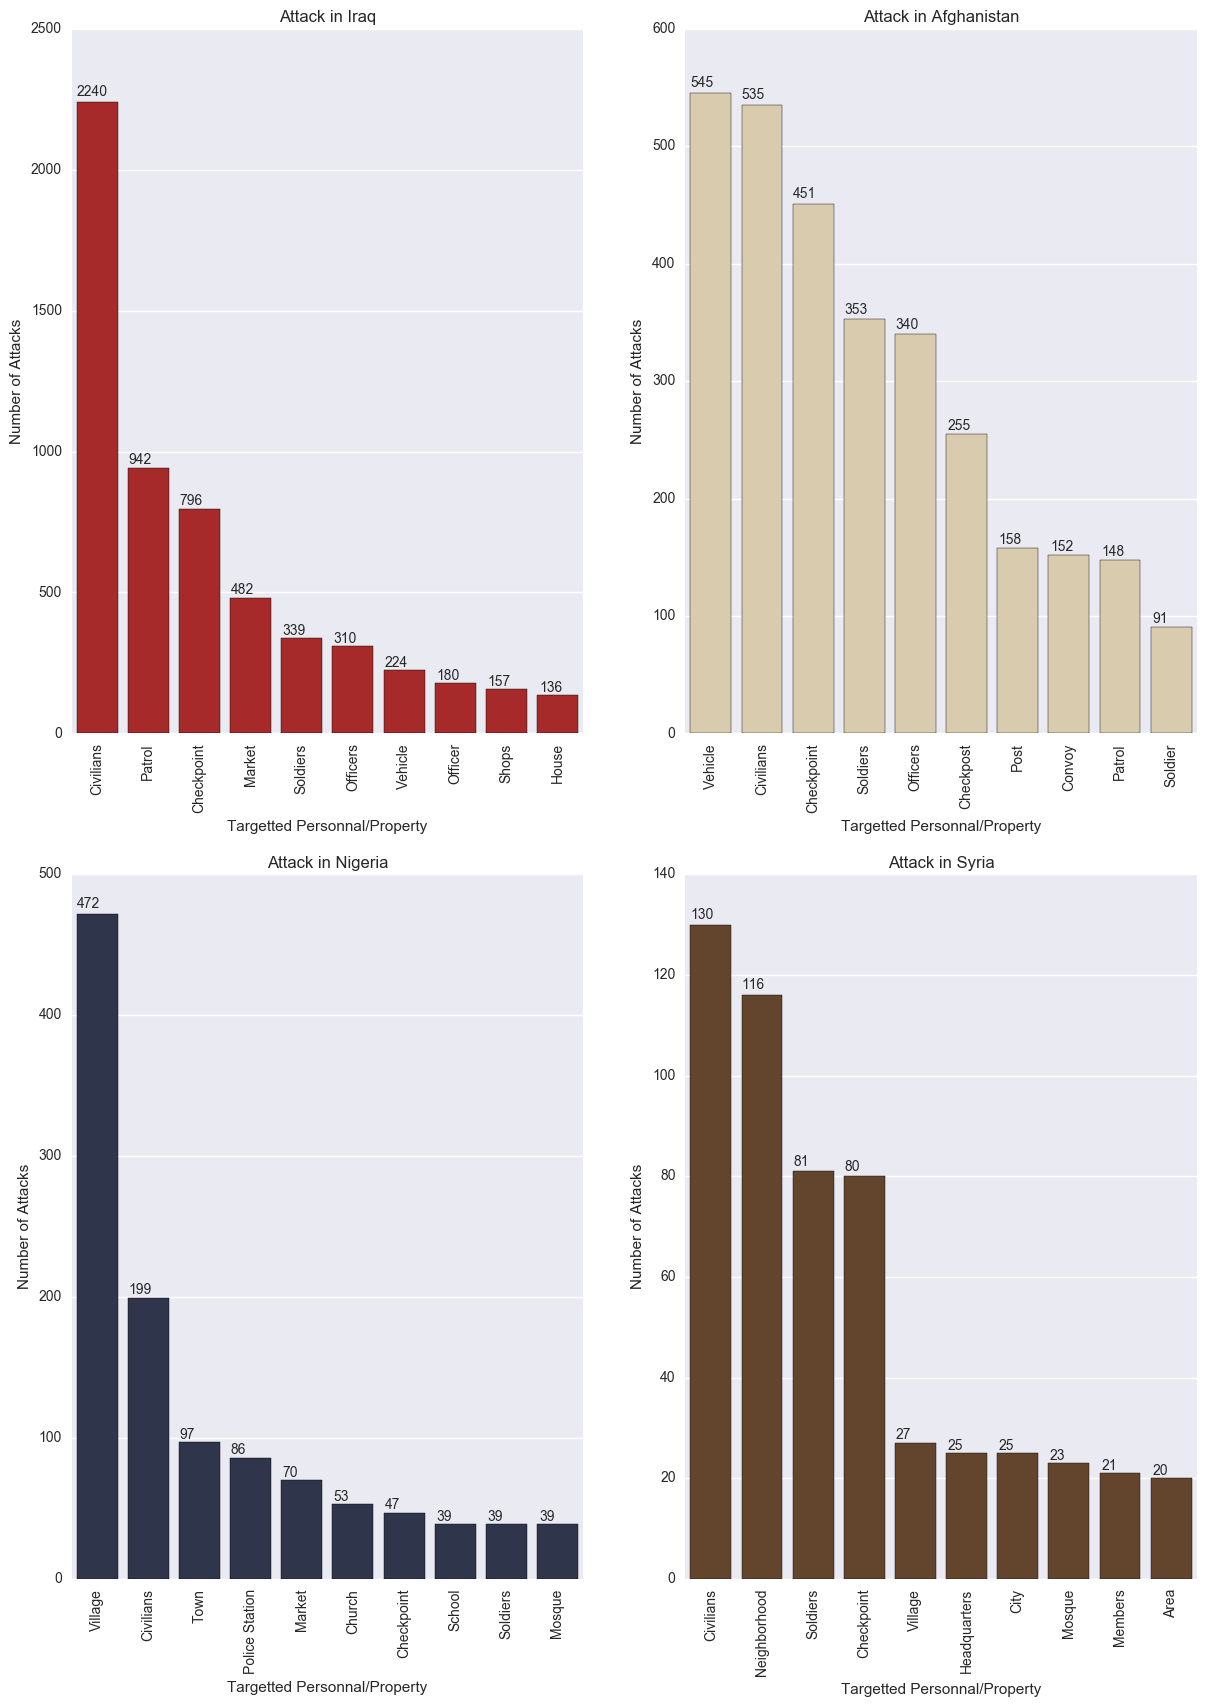

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1 = sns.barplot(x="target1", y="Attacks", data=data_iraq, ax=ax1, color="#bb1515") 
ax1.set_title('Attack in Iraq')
ax1.set_xlabel("Targetted Personnal/Property")
ax1.set_ylabel("Number of Attacks")

ax2 = sns.barplot(x="target1", y="Attacks", data=data_afghanistan, ax=ax2, color="#e0cda7") 
ax2.set_title('Attack in Afghanistan')
ax2.set_xlabel("Targetted Personnal/Property")
ax2.set_ylabel("Number of Attacks")

ax3 = sns.barplot(x="target1", y="Attacks", data=data_nigeria, ax=ax3, color="#2a334f") 
ax3.set_title('Attack in Nigeria')
ax3.set_xlabel("Targetted Personnal/Property")
ax3.set_ylabel("Number of Attacks")

ax4 = sns.barplot(x="target1", y="Attacks", data=data_syria, ax=ax4, color="#6b4423") 
ax4.set_title('Attack in Syria')
ax4.set_xlabel("Targetted Personnal/Property")
ax4.set_ylabel("Number of Attacks")

plt.subplots_adjust(right=2, top=4)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')
        
plt.savefig('ana_5\\top4propertyattack.png', bbox_inches='tight')

### It can be seen from the above graphs that:
    - The top four most affected countries by terrorist attacks as per wikipedia has more percentage of attacks in 
      normal areas as compared to the attacks on government or militry infrastructure.
    - This pattern clearly bifurcate with the terrorist motives to protest against the wrongdoing that 
      they have suffered from the political or militry establishment in a country.
    - They are attacking and killing normal innocent people in the name of Jihad.
    - These attacks not only make a country poorer but also injest the fearsome feeling of being unsafe in a person.